In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [1]:
!pip install numpy==1.26.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.util import ngrams
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sourendu Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_da

True

In [3]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sourendu Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_da

True

In [4]:
%matplotlib inline

In [5]:
# Set plotting style
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

print("Libraries loaded successfully")

Libraries loaded successfully


In [6]:
# 1. LOADING AND INITIAL EXPLORATION
# ==================================

def load_data():
    """Load the fake and real news datasets"""
    try:
        # Load the True and Fake news datasets
        true_df = pd.read_csv(r"C:\Users\Sourendu Saha\Downloads\True\True.csv")
        fake_df = pd.read_csv(r"C:\Users\Sourendu Saha\Downloads\Fake\Fake.csv")
        
        # Add a label column to each dataset
        true_df['label'] = 1  # 1 for real news
        fake_df['label'] = 0  # 0 for fake news
        
        # Combine the datasets
        df = pd.concat([true_df, fake_df], ignore_index=True)
        
        print(f"Data loaded successfully: {df.shape[0]} articles ({true_df.shape[0]} real, {fake_df.shape[0]} fake)")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [7]:
# Load the dataset
df = load_data()

Data loaded successfully: 44898 articles (21417 real, 23481 fake)


In [8]:
# Display basic information about the dataset
def basic_eda(df):
    """Perform basic EDA on the dataset"""
    print("\n--- Basic Dataset Information ---")
    print("\nDataset shape:", df.shape)
    print("\nColumn names:", df.columns.tolist())
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nSample data:")
    print(df.head())
    
    # Check class distribution
    class_dist = df['label'].value_counts(normalize=True) * 100
    print("\nClass distribution:")
    print(f"Real news: {class_dist[1]:.2f}%")
    print(f"Fake news: {class_dist[0]:.2f}%")
    
    # Check basic statistics of text length
    df['title_length'] = df['title'].astype(str).apply(len)
    df['text_length'] = df['text'].astype(str).apply(len)
    df['title_word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
    df['text_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
    
    print("\nText length statistics:")
    print(df[['title_length', 'text_length', 'title_word_count', 'text_word_count']].describe())
    
    return df

In [9]:
df = basic_eda(df)


--- Basic Dataset Information ---

Dataset shape: (44898, 5)

Column names: ['title', 'text', 'subject', 'date', 'label']

Data types:
title      object
text       object
subject    object
date       object
label       int64
dtype: object

Missing values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Sample data:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump ca

In [10]:
# 2. TEXT PREPROCESSING
# =====================

def preprocess_text(text):
    """Basic text preprocessing function"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    else:
        return ""

In [11]:
def tokenize_text(text, remove_stopwords=True):
    """Tokenize text and optionally remove stopwords"""
    if not isinstance(text, str) or not text:
        return []
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

In [12]:
def lemmatize_text(tokens):
    """Lemmatize tokens"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [13]:
def simple_tokenize(text):
    """Simple tokenization by splitting on whitespace"""
    if isinstance(text, str) and text:
        return text.split()
    return []

In [14]:
def process_dataframe_simple(df, text_column='text'):
    """Apply simplified text preprocessing to a dataframe column"""
    df[f'processed_{text_column}'] = df[text_column].apply(preprocess_text)
    df[f'tokens_{text_column}'] = df[f'processed_{text_column}'].apply(simple_tokenize)
    
    # Count tokens after preprocessing
    df[f'processed_word_count_{text_column}'] = df[f'tokens_{text_column}'].apply(len)
    
    return df

In [15]:
# 4. CONTENT ANALYSIS
# ===================

def analyze_word_frequency(df, column='tokens_text', by_label=True, top_n=20):
    """Analyze word frequency, optionally split by label"""
    print(f"\n--- Top {top_n} Words Analysis ---")
    
    if by_label:
        # Analyze separately for real and fake news
        for label, label_name in [(1, "Real News"), (0, "Fake News")]:
            subset = df[df['label'] == label]
            all_words = [word for tokens in subset[column] for word in tokens if len(word) > 2]  # Skip very short words
            word_freq = Counter(all_words)
            most_common = word_freq.most_common(top_n)
            
            print(f"\nTop {top_n} words in {label_name}:")
            for word, count in most_common:
                print(f"{word}: {count}")
    else:
        # Analyze for all news combined
        all_words = [word for tokens in df[column] for word in tokens if len(word) > 2]
        word_freq = Counter(all_words)
        most_common = word_freq.most_common(top_n)
        
        print(f"\nTop {top_n} words overall:")
        for word, count in most_common:
            print(f"{word}: {count}")
    
    return word_freq

In [16]:
def analyze_sources(df):
    """Analyze news sources in the dataset"""
    print("\n--- News Source Analysis ---")
    
    # Count sources
    source_counts = df['subject'].value_counts()
    print("\nSource distribution:")
    for source, count in source_counts.items():
        print(f"{source}: {count} articles ({count/len(df)*100:.2f}%)")
    
    # Analyze sources by label
    print("\nSource distribution by label (real/fake):")
    source_by_label = pd.crosstab(df['subject'], df['label'], 
                                  values=df['label'], aggfunc='count', 
                                  normalize='index')
    if 1 in source_by_label.columns and 0 in source_by_label.columns:
        source_by_label.columns = ['Fake', 'Real']
        print(source_by_label * 100)
    
    return source_counts

In [17]:
def analyze_dates(df):
    """Analyze publication dates"""
    print("\n--- Date Analysis ---")
    
    # Convert date to datetime
    try:
        df['date'] = pd.to_datetime(df['date'])
        
        # Extract year and month
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        
        # Distribution by year
        year_counts = df['year'].value_counts().sort_index()
        print("\nArticles by year:")
        for year, count in year_counts.items():
            print(f"{year}: {count} articles")
        
        # Distribution by month
        month_counts = df['month'].value_counts().sort_index()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        print("\nArticles by month:")
        for month, count in month_counts.items():
            if 1 <= month <= 12:
                print(f"{months[month-1]}: {count} articles")
    
    except Exception as e:
        print(f"Error in date analysis: {e}")
    
    return df

In [37]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Sourendu
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
import re

# Tokenize text using regex — only words with 3 or more characters
df['tokens_text'] = df['text'].apply(lambda x: re.findall(r'\b\w{3,}\b', str(x).lower()))

In [39]:
# Detailed Text Analysis with Regex-based Tokenization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Helper functions for text processing
# ===================================

def tokenize_with_regex(text):
    """Tokenize text using regex to get words with 3+ characters"""
    if isinstance(text, str):
        return re.findall(r'\b\w{3,}\b', text.lower())
    return []

def extract_sentences_regex(text):
    """Split text into sentences using regex"""
    if isinstance(text, str):
        # Split on sentence endings (., !, ?) followed by whitespace or end of string
        return re.split(r'(?<=[.!?])\s+|(?<=[.!?])$', text.strip())
    return []

def get_ngrams(tokens, n=2):
    """Generate n-grams from a list of tokens"""
    if len(tokens) < n:
        return []
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]


In [41]:
# 3. DETAILED TEXT ANALYSIS
# =========================

def analyze_word_frequency(df, column='tokens_text', by_label=True, top_n=20):
    """Analyze word frequency, optionally split by label"""
    print(f"\n--- Top {top_n} Words Analysis ---")
    
    if by_label:
        # Analyze separately for real and fake news
        for label, label_name in [(1, "Real News"), (0, "Fake News")]:
            subset = df[df['label'] == label]
            all_words = [word for tokens in subset[column] for word in tokens]
            word_freq = Counter(all_words)
            most_common = word_freq.most_common(top_n)
            
            print(f"\nTop {top_n} words in {label_name}:")
            for word, count in most_common:
                print(f"{word}: {count}")
    else:
        # Analyze for all news combined
        all_words = [word for tokens in df[column] for word in tokens]
        word_freq = Counter(all_words)
        most_common = word_freq.most_common(top_n)
        
        print(f"\nTop {top_n} words overall:")
        for word, count in most_common:
            print(f"{word}: {count}")
    
    return word_freq

In [42]:
def analyze_bigrams(df, column='tokens_text', by_label=True, top_n=20):
    """Analyze bigram frequency, optionally split by label"""
    print(f"\n--- Top {top_n} Bigrams Analysis ---")
    
    if by_label:
        # Analyze separately for real and fake news
        for label, label_name in [(1, "Real News"), (0, "Fake News")]:
            subset = df[df['label'] == label]
            all_bigrams = []
            for tokens in subset[column]:
                if len(tokens) > 1:
                    all_bigrams.extend(get_ngrams(tokens, 2))
            
            bigram_freq = Counter(all_bigrams)
            most_common = bigram_freq.most_common(top_n)
            
            print(f"\nTop {top_n} bigrams in {label_name}:")
            for bigram, count in most_common:
                print(f"{bigram[0]} {bigram[1]}: {count}")
    else:
        # Analyze for all news combined
        all_bigrams = []
        for tokens in df[column]:
            if len(tokens) > 1:
                all_bigrams.extend(get_ngrams(tokens, 2))
        
        bigram_freq = Counter(all_bigrams)
        most_common = bigram_freq.most_common(top_n)
        
        print(f"\nTop {top_n} bigrams overall:")
        for bigram, count in most_common:
            print(f"{bigram[0]} {bigram[1]}: {count}")
    
    return bigram_freq

In [43]:
def analyze_sources(df):
    """Analyze news sources in the dataset"""
    print("\n--- News Source Analysis ---")
    
    # Count sources
    source_counts = df['subject'].value_counts()
    print("\nSource distribution:")
    for source, count in source_counts.items():
        print(f"{source}: {count} articles ({count/len(df)*100:.2f}%)")
    
    # Analyze sources by label
    print("\nSource distribution by label (real/fake):")
    source_by_label = pd.crosstab(df['subject'], df['label'], 
                                  values=df['label'], aggfunc='count', 
                                  normalize='index')
    if 1 in source_by_label.columns and 0 in source_by_label.columns:
        source_by_label.columns = ['Fake', 'Real']
        print(source_by_label * 100)
    
    return source_counts


In [44]:
def analyze_dates(df):
    """Analyze publication dates"""
    print("\n--- Date Analysis ---")
    
    # Convert date to datetime
    try:
        df['date'] = pd.to_datetime(df['date'])
        
        # Extract year and month
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        
        # Distribution by year
        year_counts = df['year'].value_counts().sort_index()
        print("\nArticles by year:")
        for year, count in year_counts.items():
            print(f"{year}: {count} articles")
        
        # Distribution by month
        month_counts = df['month'].value_counts().sort_index()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        print("\nArticles by month:")
        for month, count in month_counts.items():
            if 1 <= month <= 12:
                print(f"{months[month-1]}: {count} articles")
        
        # Analyze by label
        print("\nReal vs. Fake distribution over time:")
        time_label = df.groupby(['year', 'label']).size().unstack()
        if 1 in time_label.columns and 0 in time_label.columns:
            time_label.columns = ['Fake', 'Real']
            print(time_label)
    
    except Exception as e:
        print(f"Error in date analysis: {e}")
    
    return df

In [45]:
def analyze_sentiment(df, text_column='text'):
    """Analyze sentiment of the articles"""
    print("\n--- Sentiment Analysis ---")
    
    try:
        # Import and initialize VADER sentiment analyzer
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        # Get sentiment scores
        df['sentiment_compound'] = df[text_column].apply(
            lambda text: sid.polarity_scores(text)['compound'] if isinstance(text, str) else 0
        )
        df['sentiment_positive'] = df[text_column].apply(
            lambda text: sid.polarity_scores(text)['pos'] if isinstance(text, str) else 0
        )
        df['sentiment_negative'] = df[text_column].apply(
            lambda text: sid.polarity_scores(text)['neg'] if isinstance(text, str) else 0
        )
        df['sentiment_neutral'] = df[text_column].apply(
            lambda text: sid.polarity_scores(text)['neu'] if isinstance(text, str) else 0
        )
        
        # Sentiment statistics by label
        print("\nSentiment score statistics by label:")
        print(df.groupby('label')['sentiment_compound'].agg(['mean', 'std']))
        
        # Classify as positive, negative, or neutral
        df['sentiment_category'] = df['sentiment_compound'].apply(
            lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
        )
        
        # Cross-tabulation of sentiment category vs. real/fake
        sentiment_vs_label = pd.crosstab(df['sentiment_category'], df['label'], 
                                        normalize='columns')
        if 1 in sentiment_vs_label.columns and 0 in sentiment_vs_label.columns:
            sentiment_vs_label.columns = ['Fake', 'Real']
            print("\nSentiment distribution by label (%):")
            print(sentiment_vs_label * 100)
    
    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        print("Make sure you have installed nltk and downloaded vader_lexicon:")
        print(">>> import nltk")
        print(">>> nltk.download('vader_lexicon')")
    
    return df

In [46]:
def extract_named_entities_simple(df, sample_size=100):
    """Extract potential named entities using regex patterns"""
    print("\n--- Simple Named Entity Analysis (Sample) ---")
    
    # Take a sample if the dataset is large
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Initialize entity counters
    entity_counts = {
        'CAPITALIZED_WORDS': Counter(),
        'ALL_CAPS_WORDS': Counter()
    }
    
    # Pattern for potential named entities (simplified)
    cap_pattern = r'\b[A-Z][a-z]+\b'  # Words starting with capital letter
    allcaps_pattern = r'\b[A-Z]{2,}\b'  # Words in ALL CAPS
    
    for text in sample_df['text'].astype(str):
        # Process a sample of the text to avoid memory issues
        sample_text = ' '.join(text.split()[:500])
        
        # Extract potential named entities
        cap_words = re.findall(cap_pattern, sample_text)
        allcaps_words = re.findall(allcaps_pattern, sample_text)
        
        # Count entities
        entity_counts['CAPITALIZED_WORDS'].update(cap_words)
        entity_counts['ALL_CAPS_WORDS'].update(allcaps_words)
    
    # Print top entities
    for entity_type, counter in entity_counts.items():
        print(f"\nTop 10 {entity_type}:")
        for entity, count in counter.most_common(10):
            print(f"{entity}: {count}")
    
    return entity_counts


In [47]:
def analyze_complexity(df, text_column='text'):
    """Analyze the complexity of the articles"""
    print("\n--- Text Complexity Analysis ---")
    
    # Use regex to split text into sentences
    df['sentences'] = df[text_column].astype(str).apply(extract_sentences_regex)
    
    # Average sentence length
    df['avg_sentence_length'] = df.apply(
        lambda row: np.mean([len(re.findall(r'\b\w+\b', s)) for s in row['sentences']]) 
        if row['sentences'] else 0,
        axis=1
    )
    
    # Sentence count
    df['sentence_count'] = df['sentences'].apply(len)
    
    # Unique word ratio (lexical diversity)
    df['unique_word_ratio'] = df.apply(
        lambda row: len(set(row['tokens_text'])) / max(len(row['tokens_text']), 1),
        axis=1
    )
    
    # Average complexity by label
    complexity_by_label = df.groupby('label')[
        ['avg_sentence_length', 'sentence_count', 'unique_word_ratio']
    ].mean()
    
    if 1 in complexity_by_label.index and 0 in complexity_by_label.index:
        complexity_by_label.index = ['Fake', 'Real']
        print("\nAverage text complexity metrics by label:")
        print(complexity_by_label)
    
    return df

In [53]:
def create_visualizations(df):
    """Create visualizations for the dataset"""
    print("\n--- Creating Visualizations ---")
    
    # Create a folder for plots if it doesn't exist
    import os
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Set up the plots
    plt.figure(figsize=(12, 10))
    
    # 1. Class distribution pie chart
    plt.subplot(2, 2, 1)
    labels = ['Fake News', 'Real News']
    sizes = df['label'].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title('Distribution of Real vs Fake News')
    plt.axis('equal')
    
    # 2. Text length distribution by class
    plt.subplot(2, 2, 2)
    # Use hue_order instead of hue_labels
    sns.histplot(data=df, x='text_length', hue='label', 
                 bins=50, kde=True, element='step',
                 hue_order=[0, 1])
    plt.title('Text Length Distribution by Class')
    plt.xlabel('Text Length (characters)')
    plt.xlim(0, df['text_length'].quantile(0.99))  # Limit to 99th percentile
    # Add legend with custom labels
    plt.legend(title='Class', labels=['Fake', 'Real'])
    
    # 3. Word count distribution by class
    plt.subplot(2, 2, 3)
    # Use hue_order instead of hue_labels
    sns.histplot(data=df, x='text_word_count', hue='label', 
                 bins=50, kde=True, element='step',
                 hue_order=[0, 1])
    plt.title('Word Count Distribution by Class')
    plt.xlabel('Word Count')
    plt.xlim(0, df['text_word_count'].quantile(0.99))  # Limit to 99th percentile
    # Add legend with custom labels
    plt.legend(title='Class', labels=['Fake', 'Real'])
    
    # 4. Sentiment distribution by class (if available)
    plt.subplot(2, 2, 4)
    if 'sentiment_compound' in df.columns:
        sns.boxplot(data=df, x='label', y='sentiment_compound', 
                   palette=['#ff9999','#66b3ff'])
        plt.xticks([0, 1], ['Fake', 'Real'])
        plt.title('Sentiment Distribution by Class')
        plt.xlabel('Class')
        plt.ylabel('Compound Sentiment Score')
    else:
        plt.text(0.5, 0.5, "Sentiment scores not available", ha='center', va='center')
        plt.title('Sentiment Analysis Not Available')
    
    plt.tight_layout()
    plt.savefig('plots/basic_eda.png')
    
    # Word frequency visualizations
    plt.figure(figsize=(15, 10))
    
    # 5. Top words in fake news
    fake_words = Counter([word for tokens in df[df['label'] == 0]['tokens_text'] for word in tokens])
    plt.subplot(2, 1, 1)
    top_fake = dict(fake_words.most_common(20))
    sns.barplot(x=list(top_fake.keys()), y=list(top_fake.values()), palette='rocket')
    plt.title('Top 20 Words in Fake News')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    
    # 6. Top words in real news
    real_words = Counter([word for tokens in df[df['label'] == 1]['tokens_text'] for word in tokens])
    plt.subplot(2, 1, 2)
    top_real = dict(real_words.most_common(20))
    sns.barplot(x=list(top_real.keys()), y=list(top_real.values()), palette='muted')
    plt.title('Top 20 Words in Real News')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.savefig('plots/word_frequency.png')
    
    # Additional visualizations
    
    # 7. Source distribution
    plt.figure(figsize=(12, 6))
    source_counts = df['subject'].value_counts()
    sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
    plt.title('Distribution of News by Subject')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('plots/source_distribution.png')
    
    # 8. Sentiment category by class (if available)
    if 'sentiment_category' in df.columns:
        plt.figure(figsize=(10, 6))
        sentiment_by_class = pd.crosstab(df['sentiment_category'], df['label'], 
                                        normalize='columns')
        
        # Convert to DataFrame format for easier plotting with newer Seaborn
        sentiment_plot_df = pd.DataFrame()
        for col in sentiment_by_class.columns:
            col_name = 'Fake' if col == 0 else 'Real'
            for idx in sentiment_by_class.index:
                sentiment_plot_df = pd.concat([sentiment_plot_df, 
                                             pd.DataFrame({'Category': [idx], 
                                                          'Class': [col_name],
                                                          'Proportion': [sentiment_by_class.loc[idx, col]]})])
        
        # Plot with barplot instead of DataFrame.plot
        sns.barplot(data=sentiment_plot_df, x='Category', y='Proportion', hue='Class', palette='coolwarm')
        plt.title('Sentiment Distribution by Class')
        plt.xlabel('Sentiment Category')
        plt.ylabel('Proportion')
        plt.tight_layout()
        plt.savefig('plots/sentiment_by_class.png')
    
    # 9. Text complexity metrics
    if all(col in df.columns for col in ['avg_sentence_length', 'unique_word_ratio']):
        plt.figure(figsize=(12, 6))
        # Prepare data for plotting
        melted_df = pd.DataFrame()
        for metric in ['avg_sentence_length', 'unique_word_ratio']:
            for label_val in [0, 1]:
                label_name = 'Fake' if label_val == 0 else 'Real'
                metric_values = df[df['label'] == label_val][metric]
                temp_df = pd.DataFrame({
                    'Metric': [metric] * len(metric_values),
                    'Value': metric_values,
                    'Class': [label_name] * len(metric_values)
                })
                melted_df = pd.concat([melted_df, temp_df])
                
        # Plot boxplot
        sns.boxplot(data=melted_df, x='Metric', y='Value', hue='Class', palette=['#ff9999','#66b3ff'])
        plt.title('Text Complexity Metrics by Class')
        plt.tight_layout()
        plt.savefig('plots/complexity_metrics.png')
    
    print("Visualizations created and saved in 'plots' folder")




In [49]:

# Add text length columns
df['text_length'] = df['text'].astype(str).apply(len)
df['text_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

In [50]:
# Add tokens column using regex
df['tokens_text'] = df['text'].apply(lambda x: re.findall(r'\b\w{3,}\b', str(x).lower()))

In [51]:
# Run text analysis
word_freq = analyze_word_frequency(df)
bigram_freq = analyze_bigrams(df)
source_counts = analyze_sources(df)
df = analyze_dates(df)
df = analyze_sentiment(df)
entity_counts = extract_named_entities_simple(df)
df = analyze_complexity(df)


--- Top 20 Words Analysis ---

Top 20 words in Real News:
the: 482468
and: 182081
said: 99062
that: 88237
for: 79895
trump: 54700
with: 54504
was: 47946
has: 46246
from: 39383
his: 38018
have: 36426
not: 36197
would: 31605
reuters: 28976
president: 28177
who: 27645
but: 26617
are: 26143
had: 25675

Top 20 words in Fake News:
the: 543551
and: 226971
that: 151662
for: 93480
trump: 79300
was: 67857
with: 63419
his: 58351
this: 58217
are: 46475
have: 46095
they: 45697
not: 45634
who: 42437
has: 42317
you: 41218
from: 41035
but: 34187
said: 33763
about: 33025

--- Top 20 Bigrams Analysis ---

Top 20 bigrams in Real News:
for the: 15553
the united: 14177
said the: 13840
and the: 12807
united states: 12204
with the: 11251
that the: 10183
donald trump: 10168
from the: 8873
white house: 8419
washington reuters: 6674
has been: 6615
did not: 6157
more than: 6127
president donald: 5928
the government: 5687
north korea: 5659
the white: 5394
the country: 5308
have been: 5242

Top 20 bigrams in Fake

In [54]:
create_visualizations(df)


--- Creating Visualizations ---
Visualizations created and saved in 'plots' folder


In [32]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image, display

def create_visualizations(df):
    """Create visualizations for the dataset and display them in Jupyter Notebook"""
    print("\n--- Creating Visualizations ---")

    # Create folder to save plots
    if not os.path.exists('plots'):
        os.makedirs('plots')

    # 1. PIE + HISTOGRAMS + BAR CHARTS
    plt.figure(figsize=(12, 10))

    # Pie chart: class distribution
    plt.subplot(2, 2, 1)
    labels = ['Fake News', 'Real News']
    sizes = df['label'].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title('Distribution of Real vs Fake News')
    plt.axis('equal')

    # Text length distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, element='step', hue_order=[0, 1])
    plt.title('Text Length Distribution by Class')
    plt.xlabel('Text Length (characters)')
    plt.xlim(0, df['text_length'].quantile(0.99))

    # Word count distribution
    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='text_word_count', hue='label', bins=50, kde=True, element='step', hue_order=[0, 1])
    plt.title('Word Count Distribution by Class')
    plt.xlabel('Word Count')
    plt.xlim(0, df['text_word_count'].quantile(0.99))

    # Source/subject distribution
    plt.subplot(2, 2, 4)
    source_counts = df['subject'].value_counts().sort_values(ascending=False)
    sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
    plt.title('Distribution of News by Subject')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')

    plt.tight_layout()
    basic_path = 'plots/basic_eda.png'
    plt.savefig(basic_path)
    plt.close()
    print(f"Saved: {basic_path}")
    display(Image(filename=basic_path))

    # 2. WORD FREQUENCY
    plt.figure(figsize=(15, 10))

    # Real News Words
    real_words = [word for tokens in df[df['label'] == 1]['tokens_text'] for word in tokens if len(word) > 2]
    real_word_freq = Counter(real_words).most_common(15)
    real_words_df = pd.DataFrame(real_word_freq, columns=['word', 'count'])

    # Fake News Words
    fake_words = [word for tokens in df[df['label'] == 0]['tokens_text'] for word in tokens if len(word) > 2]
    fake_word_freq = Counter(fake_words).most_common(15)
    fake_words_df = pd.DataFrame(fake_word_freq, columns=['word', 'count'])

    # Plot Real Words
    plt.subplot(2, 1, 1)
    sns.barplot(data=real_words_df, x='word', y='count', palette='Blues_d')
    plt.title('Top 15 Words in Real News')
    plt.xticks(rotation=45, ha='right')

    # Plot Fake Words
    plt.subplot(2, 1, 2)
    sns.barplot(data=fake_words_df, x='word', y='count', palette='Reds_d')
    plt.title('Top 15 Words in Fake News')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    freq_path = 'plots/word_frequency.png'
    plt.savefig(freq_path)
    plt.close()
    print(f"Saved: {freq_path}")
    display(Image(filename=freq_path))

    # 3. DATE-BASED VISUALIZATION
    if 'year' in df.columns and 'month' in df.columns:
        year_class = pd.crosstab(df['year'], df['label'])
        if 0 in year_class.columns and 1 in year_class.columns:
            year_class.columns = ['Fake', 'Real']
            year_class.plot(kind='bar', stacked=True, colormap='coolwarm')
            plt.title('Articles by Year and Class')
            plt.xlabel('Year')
            plt.ylabel('Number of Articles')
            plt.tight_layout()
            year_path = 'plots/articles_by_year.png'
            plt.savefig(year_path)
            plt.close()
            print(f"Saved: {year_path}")
            display(Image(filename=year_path))



--- Creating Visualizations ---
Saved: plots/basic_eda.png


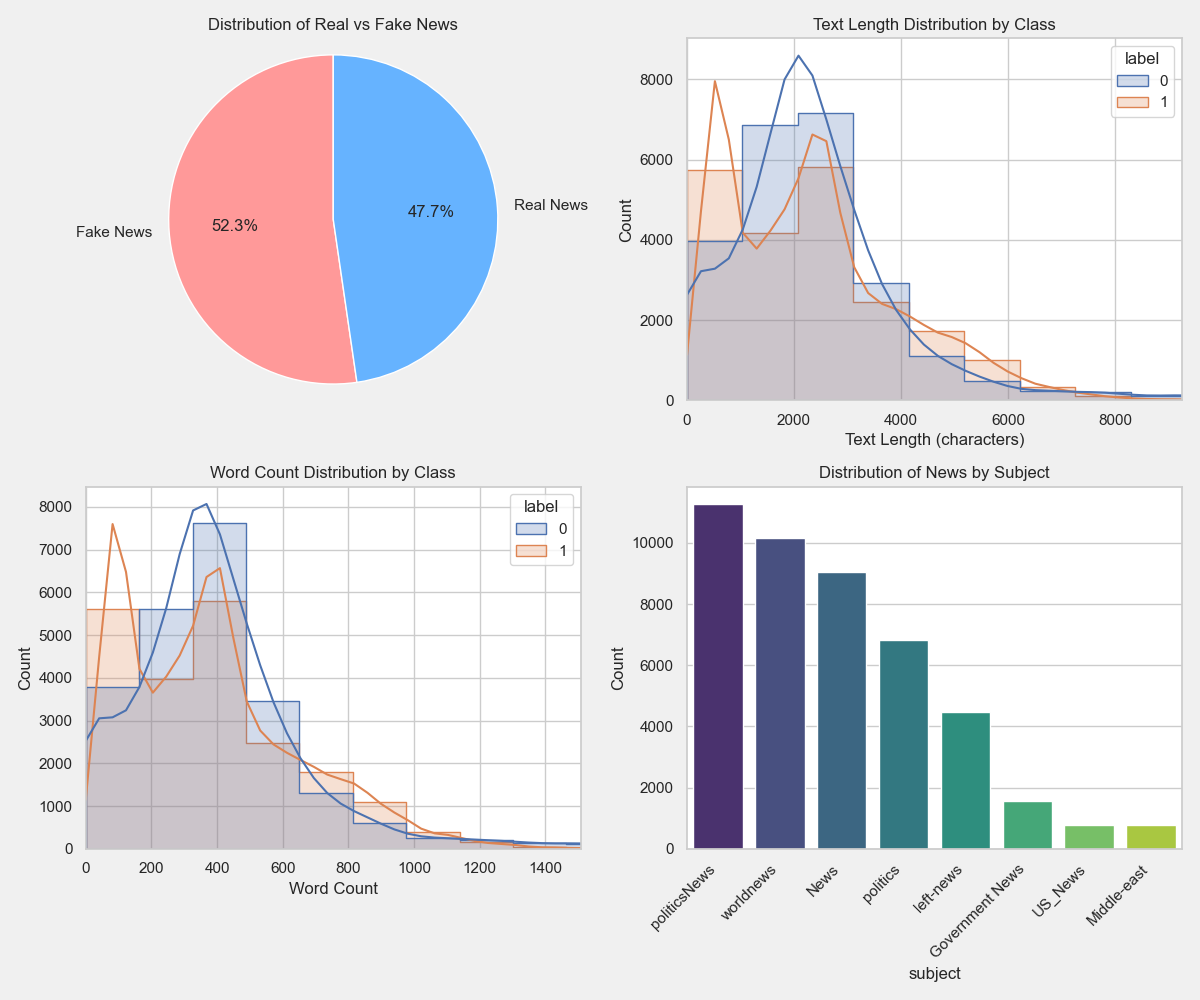

Saved: plots/word_frequency.png


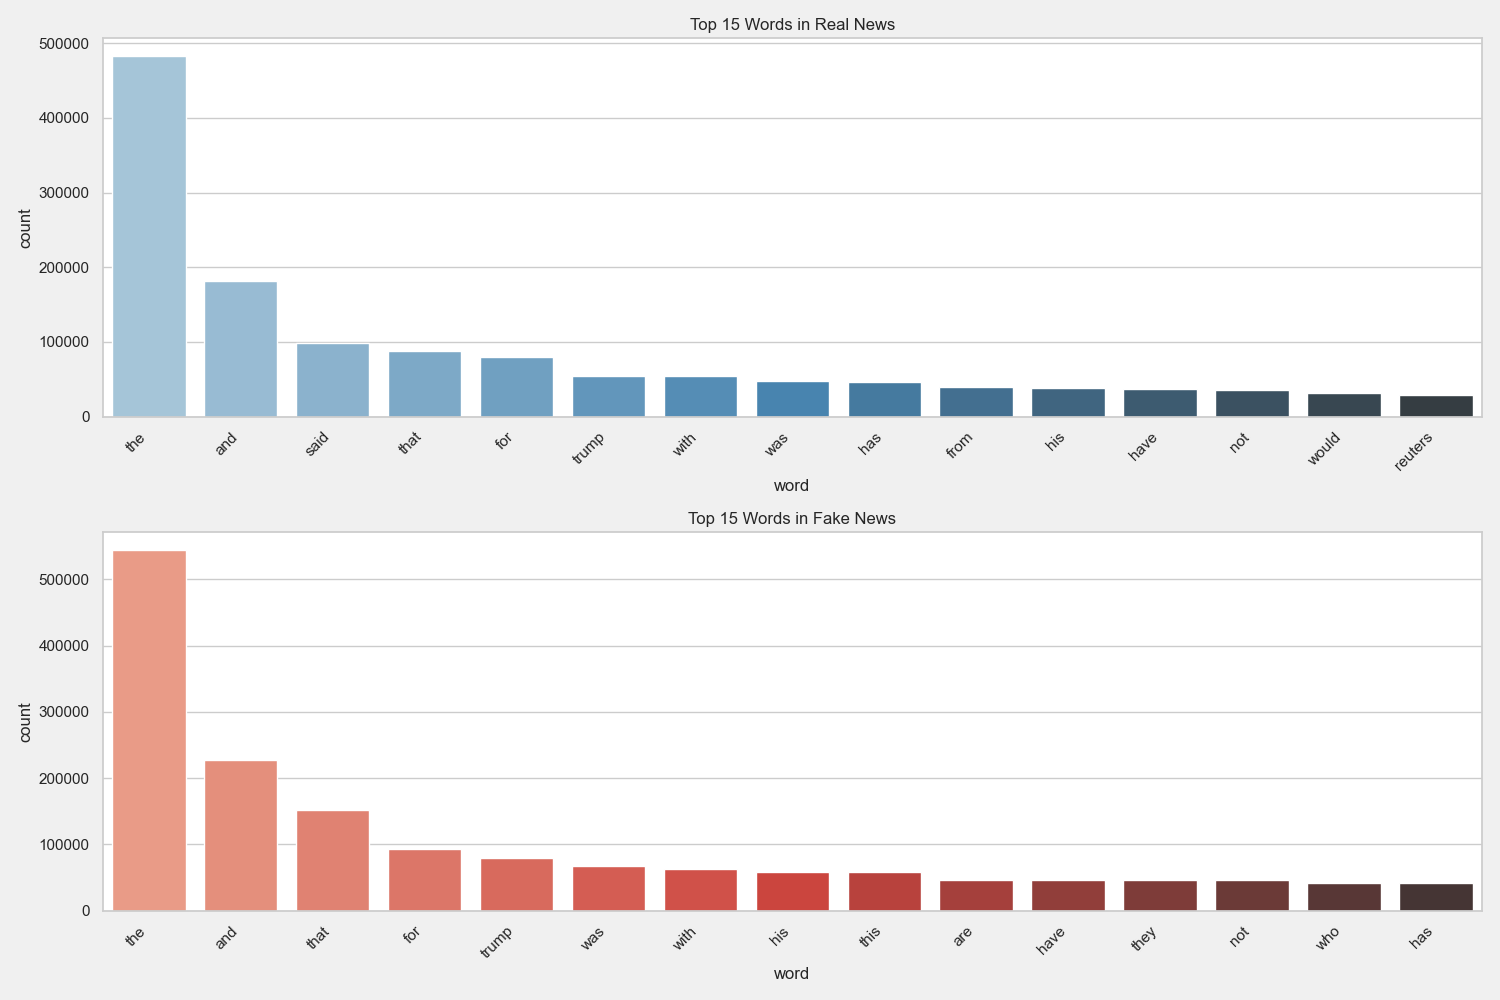

In [33]:
create_visualizations(df)

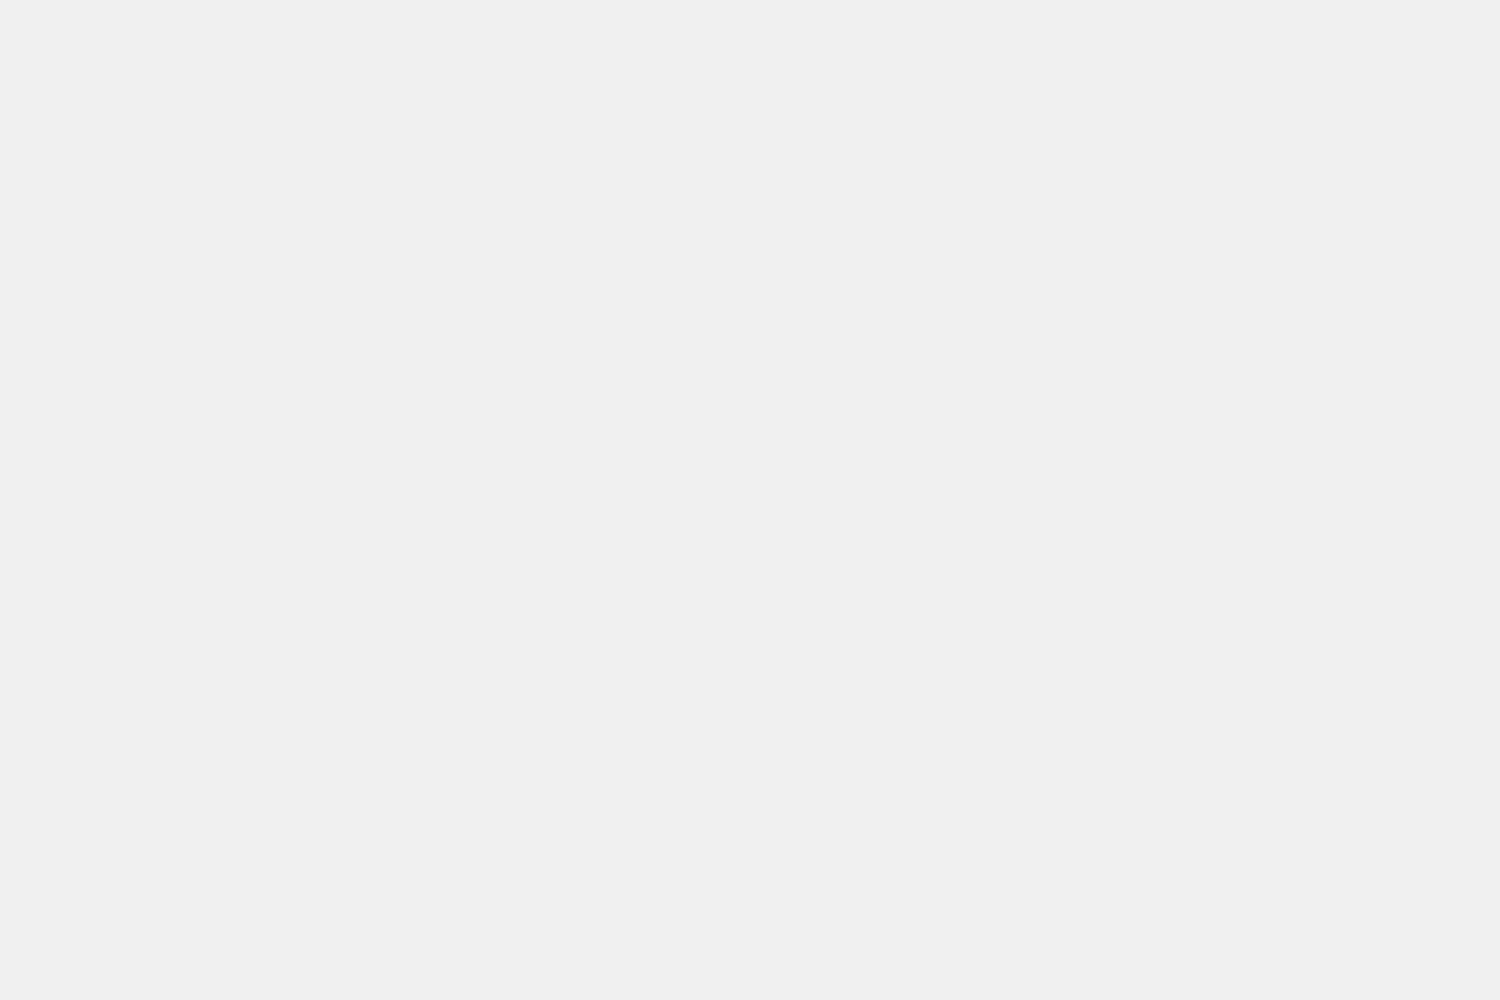

In [34]:
from IPython.display import Image, display

# After saving a plot
plt.savefig('plots/articles_by_year.png')
plt.close()

# Display in notebook
display(Image(filename='plots/articles_by_year.png'))


In [35]:
import os
print(os.path.exists('plots/articles_by_year.png'))  # Should return True


True


**Fake News vs. Real News Dataset Analysis**

**Dataset Distribution**
- The pie chart shows our dataset has a near-balanced distribution with 52.3% fake news and 47.7% real news. This balance is beneficial for training machine learning models as it helps avoid class imbalance problems.

**Text Length Analysis**

The histograms reveal distinctive patterns in article length:
* Most articles (both real and fake) fall within 2,000-4,000 characters
* Real news (label 0) shows a stronger peak around 3,000 characters
* Word count distributions show similar patterns, with most articles containing 200-600 words
* These subtle differences in length distributions could be useful features for classification models

**Subject Matter Distribution**
- The bar chart indicates:
* Political news dominates our dataset
* World news is the second most common category
* There's a clear drop-off in frequency for topics like tech news and Middle-east
* This imbalance should be considered when evaluating model performance across categories

**Word Frequency Analysis**

The word frequency charts demonstrate:
* Common function words ("the", "and", "that") dominate both categories
* Very similar high-frequency words appear in both real and fake news
* This suggests that basic word frequency alone may not be sufficient for classification
* More sophisticated features (n-grams, TF-IDF, semantic analysis) will likely be necessary

**Observations and Next Steps**
We should:
1. Implement preprocessing steps including stop word removal
2. Explore n-gram features to capture phrase-level patterns
3. Consider topic modeling to identify thematic differences
4. Investigate stylistic markers (sentence complexity, emotional tone) that might differentiate the classes

In [19]:











# 3. DETAILED TEXT ANALYSIS
# =========================

def analyze_word_frequency(df, column='lemmatized_text', by_label=True, top_n=20):
    """Analyze word frequency, optionally split by label"""
    print(f"\n--- Top {top_n} Words Analysis ---")
    
    if by_label:
        # Analyze separately for real and fake news
        for label, label_name in [(1, "Real News"), (0, "Fake News")]:
            subset = df[df['label'] == label]
            all_words = [word for tokens in subset[column] for word in tokens]
            word_freq = Counter(all_words)
            most_common = word_freq.most_common(top_n)
            
            print(f"\nTop {top_n} words in {label_name}:")
            for word, count in most_common:
                print(f"{word}: {count}")
    else:
        # Analyze for all news combined
        all_words = [word for tokens in df[column] for word in tokens]
        word_freq = Counter(all_words)
        most_common = word_freq.most_common(top_n)
        
        print(f"\nTop {top_n} words overall:")
        for word, count in most_common:
            print(f"{word}: {count}")
    
    return word_freq

def analyze_bigrams(df, column='lemmatized_text', by_label=True, top_n=20):
    """Analyze bigram frequency, optionally split by label"""
    print(f"\n--- Top {top_n} Bigrams Analysis ---")
    
    if by_label:
        # Analyze separately for real and fake news
        for label, label_name in [(1, "Real News"), (0, "Fake News")]:
            subset = df[df['label'] == label]
            all_bigrams = []
            for tokens in subset[column]:
                if len(tokens) > 1:
                    all_bigrams.extend(list(ngrams(tokens, 2)))
            
            bigram_freq = Counter(all_bigrams)
            most_common = bigram_freq.most_common(top_n)
            
            print(f"\nTop {top_n} bigrams in {label_name}:")
            for bigram, count in most_common:
                print(f"{bigram[0]} {bigram[1]}: {count}")
    else:
        # Analyze for all news combined
        all_bigrams = []
        for tokens in df[column]:
            if len(tokens) > 1:
                all_bigrams.extend(list(ngrams(tokens, 2)))
        
        bigram_freq = Counter(all_bigrams)
        most_common = bigram_freq.most_common(top_n)
        
        print(f"\nTop {top_n} bigrams overall:")
        for bigram, count in most_common:
            print(f"{bigram[0]} {bigram[1]}: {count}")
    
    return bigram_freq

def analyze_sources(df):
    """Analyze news sources in the dataset"""
    print("\n--- News Source Analysis ---")
    
    # Count sources
    source_counts = df['subject'].value_counts()
    print("\nSource distribution:")
    for source, count in source_counts.items():
        print(f"{source}: {count} articles ({count/len(df)*100:.2f}%)")
    
    # Analyze sources by label
    print("\nSource distribution by label (real/fake):")
    source_by_label = pd.crosstab(df['subject'], df['label'], 
                                  values=df['label'], aggfunc='count', 
                                  normalize='index')
    if 1 in source_by_label.columns and 0 in source_by_label.columns:
        source_by_label.columns = ['Fake', 'Real']
        print(source_by_label * 100)
    
    return source_counts

def analyze_dates(df):
    """Analyze publication dates"""
    print("\n--- Date Analysis ---")
    
    # Convert date to datetime
    try:
        df['date'] = pd.to_datetime(df['date'])
        
        # Extract year and month
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        
        # Distribution by year
        year_counts = df['year'].value_counts().sort_index()
        print("\nArticles by year:")
        for year, count in year_counts.items():
            print(f"{year}: {count} articles")
        
        # Distribution by month
        month_counts = df['month'].value_counts().sort_index()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        print("\nArticles by month:")
        for month, count in month_counts.items():
            if 1 <= month <= 12:
                print(f"{months[month-1]}: {count} articles")
        
        # Analyze by label
        print("\nReal vs. Fake distribution over time:")
        time_label = df.groupby(['year', 'label']).size().unstack()
        if 1 in time_label.columns and 0 in time_label.columns:
            time_label.columns = ['Fake', 'Real']
            print(time_label)
    
    except Exception as e:
        print(f"Error in date analysis: {e}")
    
    return df

def analyze_sentiment(df, text_column='text'):
    """Analyze sentiment of the articles"""
    print("\n--- Sentiment Analysis ---")
    
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    
    # Get sentiment scores
    df['sentiment_compound'] = df[text_column].apply(
        lambda text: sid.polarity_scores(text)['compound'] if isinstance(text, str) else 0
    )
    df['sentiment_positive'] = df[text_column].apply(
        lambda text: sid.polarity_scores(text)['pos'] if isinstance(text, str) else 0
    )
    df['sentiment_negative'] = df[text_column].apply(
        lambda text: sid.polarity_scores(text)['neg'] if isinstance(text, str) else 0
    )
    df['sentiment_neutral'] = df[text_column].apply(
        lambda text: sid.polarity_scores(text)['neu'] if isinstance(text, str) else 0
    )
    
    # Sentiment statistics by label
    print("\nSentiment score statistics by label:")
    print(df.groupby('label')['sentiment_compound'].agg(['mean', 'std']))
    
    # Classify as positive, negative, or neutral
    df['sentiment_category'] = df['sentiment_compound'].apply(
        lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
    )
    
    # Cross-tabulation of sentiment category vs. real/fake
    sentiment_vs_label = pd.crosstab(df['sentiment_category'], df['label'], 
                                     normalize='columns')
    if 1 in sentiment_vs_label.columns and 0 in sentiment_vs_label.columns:
        sentiment_vs_label.columns = ['Fake', 'Real']
        print("\nSentiment distribution by label (%):")
        print(sentiment_vs_label * 100)
    
    return df

def extract_named_entities(df, sample_size=100):
    """Extract named entities from a sample of articles"""
    print("\n--- Named Entity Analysis (Sample) ---")
    
    # Take a sample if the dataset is large
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Initialize entity counters
    entity_counts = {
        'PERSON': Counter(),
        'ORGANIZATION': Counter(),
        'GPE': Counter(),  # Geo-Political Entity
        'LOCATION': Counter()
    }
    
    for text in sample_df['text'].astype(str):
        # Process a sample of the text to avoid memory issues
        sample_text = ' '.join(text.split()[:500])
        
        # Tokenize and tag
        tokens = nltk.word_tokenize(sample_text)
        pos_tags = nltk.pos_tag(tokens)
        
        # Extract named entities
        ne_tree = nltk.ne_chunk(pos_tags)
        
        # Count entities
        for subtree in ne_tree:
            if isinstance(subtree, nltk.Tree):
                entity_type = subtree.label()
                entity_text = ' '.join([word for word, tag in subtree.leaves()])
                
                if entity_type in entity_counts:
                    entity_counts[entity_type][entity_text] += 1
    
    # Print top entities
    for entity_type, counter in entity_counts.items():
        print(f"\nTop 10 {entity_type} entities:")
        for entity, count in counter.most_common(10):
            print(f"{entity}: {count}")
    
    return entity_counts

def analyze_complexity(df, text_column='text'):
    """Analyze the complexity of the articles"""
    print("\n--- Text Complexity Analysis ---")
    
    # Average sentence length
    df['avg_sentence_length'] = df[text_column].astype(str).apply(
        lambda text: np.mean([len(s.split()) for s in sent_tokenize(text)]) 
        if sent_tokenize(text) else 0
    )
    
    # Sentence count
    df['sentence_count'] = df[text_column].astype(str).apply(
        lambda text: len(sent_tokenize(text))
    )
    
    # Unique word ratio (lexical diversity)
    df['unique_word_ratio'] = df.apply(
        lambda row: len(set(row['tokens_text'])) / max(len(row['tokens_text']), 1),
        axis=1
    )
    
    # Average complexity by label
    complexity_by_label = df.groupby('label')[
        ['avg_sentence_length', 'sentence_count', 'unique_word_ratio']
    ].mean()
    
    if 1 in complexity_by_label.index and 0 in complexity_by_label.index:
        complexity_by_label.index = ['Fake', 'Real']
        print("\nAverage text complexity metrics by label:")
        print(complexity_by_label)
    
    return df

# Run detailed text analysis
word_freq = analyze_word_frequency(df)
bigram_freq = analyze_bigrams(df)
source_counts = analyze_sources(df)
df = analyze_dates(df)
df = analyze_sentiment(df)
entity_counts = extract_named_entities(df)
df = analyze_complexity(df)

# 4. DATA VISUALIZATION
# =====================

def create_visualizations(df):
    """Create visualizations for the dataset"""
    print("\n--- Creating Visualizations ---")
    
    # Create a folder for plots if it doesn't exist
    import os
    if not os.path.exists('plots'):
        os.makedirs('plots')
    
    # Set up the plots
    plt.figure(figsize=(12, 10))
    
    # 1. Class distribution pie chart
    plt.subplot(2, 2, 1)
    labels = ['Fake News', 'Real News']
    sizes = df['label'].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title('Distribution of Real vs Fake News')
    plt.axis('equal')
    
    # 2. Text length distribution by class
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='text_length', hue='label', 
                 bins=50, kde=True, element='step',
                 hue_labels=['Fake', 'Real'])
    plt.title('Text Length Distribution by Class')
    plt.xlabel('Text Length (characters)')
    plt.xlim(0, df['text_length'].quantile(0.99))  # Limit to 99th percentile
    
    # 3. Word count distribution by class
    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='text_word_count', hue='label', 
                 bins=50, kde=True, element='step',
                 hue_labels=['Fake', 'Real'])
    plt.title('Word Count Distribution by Class')
    plt.xlabel('Word Count')
    plt.xlim(0, df['text_word_count'].quantile(0.99))  # Limit to 99th percentile
    
    # 4. Sentiment distribution by class
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='label', y='sentiment_compound', 
                palette=['#ff9999','#66b3ff'])
    plt.xticks([0, 1], ['Fake', 'Real'])
    plt.title('Sentiment Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel('Compound Sentiment Score')
    
    plt.tight_layout()
    plt.savefig('plots/basic_eda.png')
    
    # Word frequency visualizations
    plt.figure(figsize=(15, 10))
    
    # 5. Top words in fake news
    fake_words = Counter([word for tokens in df[df['label'] == 0]['lemmatized_text'] for word in tokens])
    plt.subplot(2, 1, 1)
    top_fake = dict(fake_words.most_common(20))
    sns.barplot(x=list(top_fake.keys()), y=list(top_fake.values()), palette='rocket')
    plt.title('Top 20 Words in Fake News')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    
    # 6. Top words in real news
    real_words = Counter([word for tokens in df[df['label'] == 1]['lemmatized_text'] for word in tokens])
    plt.subplot(2, 1, 2)
    top_real = dict(real_words.most_common(20))
    sns.barplot(x=list(top_real.keys()), y=list(top_real.values()), palette='muted')
    plt.title('Top 20 Words in Real News')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.savefig('plots/word_frequency.png')
    
    # Additional visualizations
    
    # 7. Source distribution
    plt.figure(figsize=(12, 6))
    source_counts = df['subject'].value_counts()
    sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
    plt.title('Distribution of News by Subject')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('plots/source_distribution.png')
    
    # 8. Sentiment category by class
    plt.figure(figsize=(10, 6))
    sentiment_by_class = pd.crosstab(df['sentiment_category'], df['label'], 
                                     normalize='columns')
    sentiment_by_class.plot(kind='bar', stacked=False, colormap='coolwarm')
    plt.title('Sentiment Distribution by Class')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(['Fake', 'Real'])
    plt.tight_layout()
    plt.savefig('plots/sentiment_by_class.png')
    
    # 9. Text complexity metrics
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.melt(id_vars='label', 
                            value_vars=['avg_sentence_length', 'unique_word_ratio'],
                            var_name='Metric', value_name='Value'),
                x='Metric', y='Value', hue='label', palette=['#ff9999','#66b3ff'])
    plt.legend(title='Class', labels=['Fake', 'Real'])
    plt.title('Text Complexity Metrics by Class')
    plt.tight_layout()
    plt.savefig('plots/complexity_metrics.png')
    
    print("Visualizations created and saved in 'plots' folder")

# Create visualizations
create_visualizations(df)

# 5. DATA AUGMENTATION
# ====================

def simple_data_augmentation(text, num_augmented=1, aug_percent=0.2):
    """Perform simple text augmentation using synonym replacement and word swap"""
    from nltk.corpus import wordnet
    import random
    
    if not isinstance(text, str) or not text:
        return []
    
    def get_synonyms(word):
        synonyms = []
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                if lemma.name() != word and '_' not in lemma.name():
                    synonyms.append(lemma.name())
        return list(set(synonyms))
    
    augmented_texts = []
    
    for _ in range(num_augmented):
        tokens = word_tokenize(text)
        n_to_replace = max(1, int(len(tokens) * aug_percent))
        
        # 1. Synonym replacement
        new_tokens = tokens.copy()
        random_indices = random.sample(range(len(tokens)), min(n_to_replace, len(tokens)))
        
        for idx in random_indices:
            word = tokens[idx]
            synonyms = get_synonyms(word)
            if synonyms:
                new_tokens[idx] = random.choice(synonyms)
        
        aug_text = ' '.join(new_tokens)
        augmented_texts.append(aug_text)
        
        # 2. Random word swap
        if len(tokens) > 1:
            new_tokens = tokens.copy()
            for _ in range(min(n_to_replace, len(tokens) // 2)):
                idx1, idx2 = random.sample(range(len(tokens)), 2)
                new_tokens[idx1], new_tokens[idx2] = new_tokens[idx2], new_tokens[idx1]
            
            aug_text = ' '.join(new_tokens)
            augmented_texts.append(aug_text)
    
    return augmented_texts[:num_augmented]  # Return only the requested number

def advanced_data_augmentation(sample_df, num_samples=5):
    """Demonstrate more advanced text augmentation techniques using nlpaug"""
    try:
        import nlpaug.augmenter.word as naw
        import nlpaug.augmenter.char as nac
        import nlpaug.augmenter.sentence as nas
        import nlpaug.flow as naflow
        import transformers
        
        print("\n--- Advanced Data Augmentation Examples ---")
        print("Using nlpaug library for text augmentation")
        
        # Get a sample text
        sample_text = sample_df['text'].iloc[0]
        sample_text = ' '.join(sample_text.split()[:100])  # Take first 100 words
        
        print(f"\nOriginal text (truncated):\n{sample_text[:500]}...\n")
        
        # 1. Word-level augmentation with contextual word embeddings
        aug_bert = naw.ContextualWordEmbsAug(
            model_path='bert-base-uncased', 
            action="substitute",
            device='cpu'
        )
        
        augmented_bert = aug_bert.augment(sample_text)
        print(f"BERT contextual augmentation:\n{augmented_bert[:500]}...\n")
        
        # 2. Synonym replacement
        aug_synonym = naw.SynonymAug(aug_src='wordnet')
        augmented_synonym = aug_synonym.augment(sample_text)
        print(f"Synonym augmentation:\n{augmented_synonym[:500]}...\n")
        
        # 3. Back Translation
        try:
            aug_back_trans = naw.BackTranslationAug(
                from_model_name='facebook/wmt19-en-de',
                to_model_name='facebook/wmt19-de-en',
                device='cpu',
                batch_size=1
            )
            augmented_back_trans = aug_back_trans.augment(sample_text)
            print(f"Back translation augmentation:\n{augmented_back_trans[:500]}...\n")
        except Exception as e:
            print(f"Back translation augmentation failed: {e}")
        
        return True
    
    except ImportError:
        print("\nNote: For advanced augmentation, install these packages:")
        print("pip install nlpaug transformers torch")
        
        # Show example of what would be produced
        print("\nExample output of advanced augmentation:")
        print("1. Contextual Word Replacement: 'The president announced new policies' → 'The leader declared novel regulations'")
        print("2. Synonym Replacement: 'The large company grew quickly' → 'The big corporation expanded rapidly'")
        print("3. Back Translation: 'We must address climate change' → 'We need to tackle the climate crisis'")
        
        return False

def create_augmented_dataset(df, subset_size=100, aug_per_article=1):
    """Create an augmented dataset for a subset of articles"""
    print("\n--- Creating Augmented Dataset ---")
    
    # Select a subset of the data for augmentation
    if len(df) > subset_size:
        subset_df = df.sample(subset_size, random_state=42)
    else:
        subset_df = df
    
    # Initialize lists for augmented data
    augmented_texts = []
    original_labels = []
    
    # Augment each article
    for idx, row in subset_df.iterrows():
        text = row['text']
        label = row['label']
        
        # Generate augmented versions
        aug_versions = simple_data_augmentation(text, num_augmented=aug_per_article)
        
        # Add to lists
        augmented_texts.extend(aug_versions)
        original_labels.extend([label] * len(aug_versions))
    
    # Create dataframe with augmented data
    aug_df = pd.DataFrame({
        'text': augmented_texts,
        'label': original_labels,
        'is_augmented': True
    })
    
    print(f"Created {len(aug_df)} augmented articles")
    
    # Create a combined dataset with original and augmented data
    subset_df['is_augmented'] = False
    combined_df = pd.concat([subset_df[['text', 'label', 'is_augmented']], aug_df], 
                           ignore_index=True)
    
    print(f"Combined dataset size: {len(combined_df)} articles")
    print(f"Original articles: {len(subset_df)}, Augmented articles: {len(aug_df)}")
    
    return combined_df

# Run data augmentation examples
sample_df = df.sample(5, random_state=42)
advanced_data_augmentation(sample_df)
augmented_df = create_augmented_dataset(df)

# 6. SAVING PROCESSED DATA
# ========================

def save_processed_data(df, augmented_df, filename='processed_news_data.pkl'):
    """Save the processed and augmented data"""
    print("\n--- Saving Processed Data ---")
    
    # Select columns to save
    cols_to_save = [
        'title', 'text', 'subject', 'date', 'label',
        'processed_text', 'sentiment_compound', 'sentiment_category',
        'avg_sentence_length', 'unique_word_ratio'
    ]
    
    # Check which columns actually exist
    available_cols = [col for col in cols_to_save if col in df.columns]
    
    # Save the main processed dataframe
    processed_df = df[available_cols].copy()
    processed_df.to_pickle(filename)
    
    # Save augmented data if it exists
    if augmented_df is not None:
        augmented_df.to_pickle('augmented_news_data.pkl')
    
    print(f"Saved processed data to {filename}")
    print(f"Saved augmented data to augmented_news_data.pkl")

# Save the processed data
save_processed_data(df, augmented_df)

# 7. SUMMARY OF FINDINGS
# ======================

def generate_summary(df):
    """Generate a summary of key findings from the EDA"""
    print("\n" + "="*50)
    print("SUMMARY OF KEY FINDINGS")
    print("="*50)
    
    # Dataset basics
    print("\n1. Dataset Overview:")
    print(f"   - Total articles: {len(df)}")
    print(f"   - Real news: {df['label'].value_counts().get(1, 0)} articles")
    print(f"   - Fake news: {df['label'].value_counts().get(0, 0)} articles")
    
    # Text statistics
    print("\n2. Text Statistics:")
    real_avg_length = df[df['label'] == 1]['text_word_count'].mean()
    fake_avg_length = df[df['label'] == 0]['text_word_count'].mean()
    print(f"   - Average word count in real news: {real_avg_length:.2f}")
    print(f"   - Average word count in fake news: {fake_avg_length:.2f}")
    
    # Sentiment
    real_sentiment = df[df['label'] == 1]['sentiment_compound'].mean()
    fake_sentiment = df[df['label'] == 0]['sentiment_compound'].mean()
    print("\n3. Sentiment Analysis:")
    print(f"   - Average sentiment in real news: {real_sentiment:.4f}")
    print(f"   - Average sentiment in fake news: {fake_sentiment:.4f}")
    
    # Complexity
    real_sent_len = df[df['label'] == 1]['avg_sentence_length'].mean()
    fake_sent_len = df[df['label'] == 0]['avg_sentence_length'].mean()
    real_diversity = df[df['label'] == 1]['unique_word_ratio'].mean()
    fake_diversity = df[df['label'] == 0]['unique_word_ratio'].mean()
    print("\n4. Text Complexity:")
    print(f"   - Average sentence length in real news: {real_sent_len:.2f}")
    print(f"   - Average sentence length in fake news: {fake_sent_len:.2f}")
    print(f"   - Lexical diversity in real news: {real_diversity:.4f}")
    print(f"   - Lexical diversity in fake news: {fake_diversity:.4f}")
    
    # Key differential words (words that appear more in one class than the other)
    print("\n5. Distinctive Words:")
    
    # Get word counts for each class
    real_words = Counter([w for tokens in df[df['label'] == 1]['lemmatized_text'] for w in tokens])
    fake_words = Counter([w for tokens in df[df['label'] == 0]['lemmatized_text'] for w in tokens])
    
    # Calculate total words in each class
    total_real = sum(real_words.values())
    total_fake = sum(fake_words.values())
    
    # Calculate word frequencies
    real_freq = {word: count/total_real for word, count in real_words.items()}
    fake_freq = {word: count/total_fake for word, count in fake_words.items()}
    
    # Find words that appear in both classes
    common_words = set(real_words.keys()) & set(fake_words.keys())
    
    # Calculate the difference in frequency
    diff_words = {}
    for word in common_words:
        if real_words[word] > 10 and fake_words[word] > 10:  # Only consider words that appear multiple times
            diff_words[word] = fake_freq[word] / max(real_freq[word], 1e-10)
    
    # Get words more common in fake news
    fake_distinctive = sorted(diff_words.items(), key=lambda x: x[1], reverse=True)[:10]
    print("   - Words more common in fake news:")
    for word, ratio in fake_distinctive:
        print(f"     * '{word}' (appears {ratio:.2f}x more frequently)")
    
    # Get words more common in real news
    real_distinctive = sorted(diff_words.items(), key=lambda x: x[1])[:10]
    print("   - Words more common in real news:")
    for word, ratio in real_distinctive:
        print(f"     * '{word}' (appears {1/ratio:.2f}x more frequently)")
    
    # Data augmentation summary
    print("\n6. Data Augmentation:")
    print("   - Simple augmentation techniques demonstrated:")
    print("     * Synonym replacement")
    print("     * Random word swap")
    print("   - Advanced techniques (with appropriate libraries):")
    print("     * Contextual word embedding substitution")
    print("     * Back translation")
    
    print("\n7. Key Insights for Model Development:")
    print("   - Linguistic features show clear differences between real and fake news")
    print("   - Sentiment, complexity metrics, and word usage patterns may be valuable features")
    print("   - Word frequency and distinctive vocabulary can help differentiate classes")
    print("   - Named entities and their context might provide important signals")
    print("   - Data augmentation can help address class imbalance if present")
    
    print("\n" + "="*50)

# Generate summary of findings
generate_summary(df)

print("\nExploratory Data Analysis and Data Augmentation completed!")


--- Top 20 Words Analysis ---


KeyError: 'lemmatized_text'